In [2]:
import pandas as pd

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
t = go.layout.Template(
    layout=go.Layout(
        hovermode='x'
    )
)
t.data.scatter = [
    go.Scatter(hoverlabel=go.scatter.Hoverlabel(namelength=-1))
]
pio.templates["my"] = t
pio.templates.default = "plotly_dark+my"

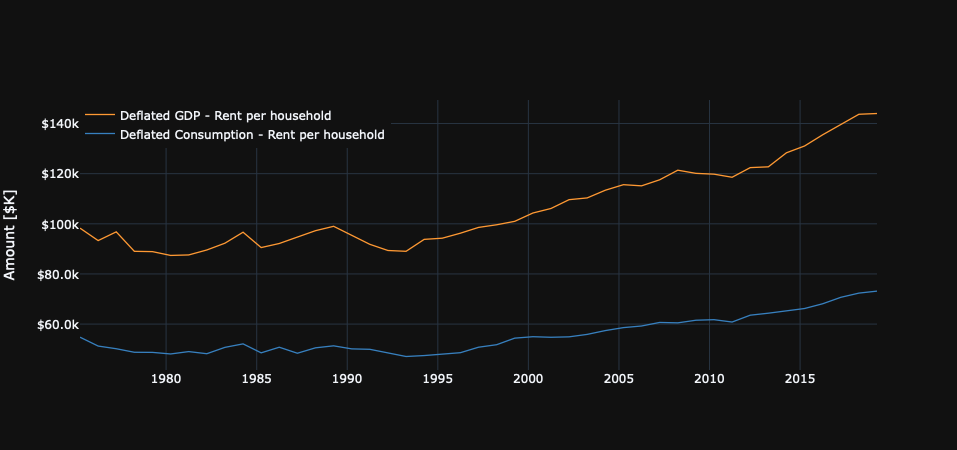

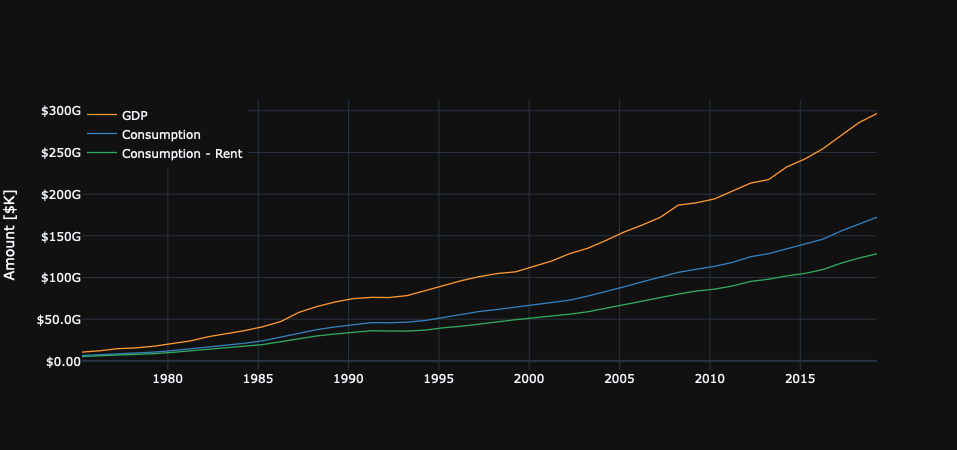

In [17]:
gdp = pd.read_csv('out/gen/gdp_1860-now.csv', parse_dates=True, index_col=0)
gdp['Deflated GDP - Rent per household'] = (gdp['GDP'] - gdp['Rent'])/gdp.Deflator/gdp['Occupied Dwellings']
gdp['Deflated Consumption - Rent per household'] = (gdp['Consumption'] - gdp['Rent'])/gdp.Deflator/gdp['Occupied Dwellings']

gdp[['Deflated GDP - Rent per household', 'Deflated Consumption - Rent per household']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)

gdp['Consumption - Rent'] = (gdp['Consumption'] - gdp['Rent'])
gdp[['GDP', 'Consumption', 'Consumption - Rent']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)




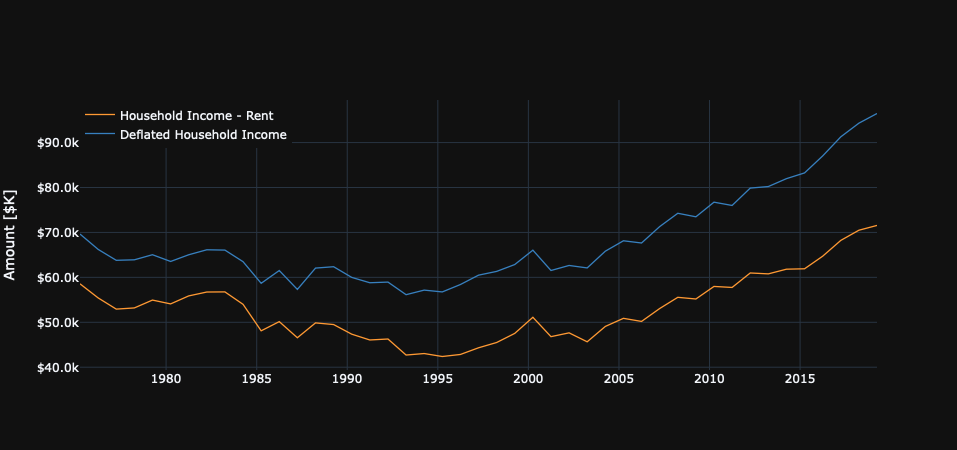

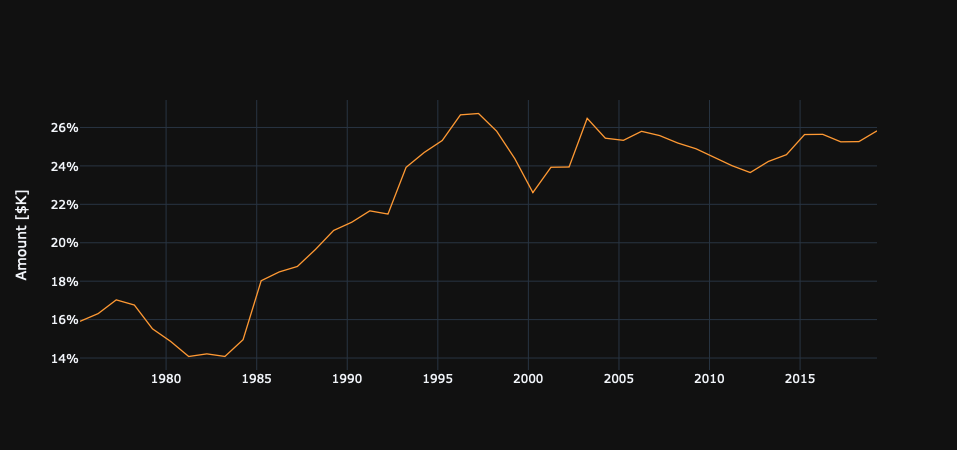

In [15]:
income = pd.read_csv('out/gen/income_stats-nz_1972-now.csv', parse_dates=True, index_col=0)
income['Deflated Household Income'] = income['Deflated Income']/income['Occupied Dwellings']
income['Household Income - Rent'] = income['Deflated Household Income'] - income['Deflated Rent']*365/7
income['Rent ratio'] = income['Deflated Rent']*365/7/income['Deflated Household Income'] 
income[['Household Income - Rent', 'Deflated Household Income']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)

income[['Rent ratio']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="%"),
        legend = go.layout.Legend(x=0)
    )
)


